# 物流に関するデータの読み込み

In [1]:
import pandas as pd

factories = pd.read_csv("tbl_factory.csv")
factories

,FCID,FCName,FCDemand,FCRegion
0,FC00001,東京工場,28,関東
1,FC00002,木更津工場,29,関東
2,FC00003,多摩工場,31,関東
3,FC00004,横須賀工場,25,関東
4,FC00005,仙台工場,21,東北
5,FC00006,山形工場,30,東北
6,FC00007,那須工場,25,東北
7,FC00008,青森工場,16,東北


In [2]:
warehouses = pd.read_csv("tbl_warehouse.csv")
warehouses

,WHID,WHName,WHSupply,WHRegion
0,WH00001,杉並倉庫,35,関東
1,WH00002,品川倉庫,41,関東
2,WH00003,豊洲倉庫,42,関東
3,WH00004,郡山倉庫,60,東北
4,WH00005,仙台倉庫,72,東北
5,WH00006,山形倉庫,65,東北


In [3]:
cost = pd.read_csv("rel_cost.csv")
cost.head()

,RCostID,FCID,WHID,Cost
0,1,FC00001,WH00001,0.4
1,2,FC00001,WH00002,0.8
2,3,FC00001,WH00003,1.5
3,4,FC00002,WH00001,0.9
4,5,FC00002,WH00002,0.8


In [4]:
trans = pd.read_csv("tbl_transaction.csv")
trans.head()

,TRID,TransactionDate,ToFC,FromWH,Quantity
0,0,2019-01-01 02:11:10,FC00004,WH00003,33
1,1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2,2019-01-01 06:32:32,FC00006,WH00004,31
3,3,2019-01-01 07:17:06,FC00002,WH00003,18
4,4,2019-01-01 07:52:18,FC00001,WH00002,30


In [5]:
join_data = pd.merge(trans, cost, left_on=["ToFC", "FromWH"],
                     right_on=["FCID", "WHID"], how="left")
join_data.head()

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID,WHID,Cost
0,0,2019-01-01 02:11:10,FC00004,WH00003,33,12,FC00004,WH00003,1.1
1,1,2019-01-01 06:12:42,FC00007,WH00006,19,21,FC00007,WH00006,1.3
2,2,2019-01-01 06:32:32,FC00006,WH00004,31,16,FC00006,WH00004,0.9
3,3,2019-01-01 07:17:06,FC00002,WH00003,18,6,FC00002,WH00003,1.6
4,4,2019-01-01 07:52:18,FC00001,WH00002,30,2,FC00001,WH00002,0.8


In [6]:
join_data = pd.merge(join_data, factories, left_on="ToFC", right_on="FCID", how="left")
join_data.head()

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID_x,WHID,Cost,FCID_y,FCName,FCDemand,FCRegion
0,0,2019-01-01 02:11:10,FC00004,WH00003,33,12,FC00004,WH00003,1.1,FC00004,横須賀工場,25,関東
1,1,2019-01-01 06:12:42,FC00007,WH00006,19,21,FC00007,WH00006,1.3,FC00007,那須工場,25,東北
2,2,2019-01-01 06:32:32,FC00006,WH00004,31,16,FC00006,WH00004,0.9,FC00006,山形工場,30,東北
3,3,2019-01-01 07:17:06,FC00002,WH00003,18,6,FC00002,WH00003,1.6,FC00002,木更津工場,29,関東
4,4,2019-01-01 07:52:18,FC00001,WH00002,30,2,FC00001,WH00002,0.8,FC00001,東京工場,28,関東


In [7]:
join_data = pd.merge(join_data, warehouses,
                     left_on="FromWH", right_on="WHID", how="left")

join_data = join_data[["TransactionDate", "Quantity", "Cost", 
                       "ToFC", "FCName", "FCDemand",
                       "FromWH", "WHName", "WHSupply", "WHRegion"]]

join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東


In [8]:
kanto = join_data.loc[join_data["WHRegion"]=="関東"]
kanto.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
7,2019-01-01 09:09:30,12,1.5,FC00001,東京工場,28,WH00003,豊洲倉庫,42,関東
8,2019-01-01 10:52:55,27,1.5,FC00003,多摩工場,31,WH00003,豊洲倉庫,42,関東


In [9]:
tohoku = join_data.loc[join_data["WHRegion"]=="東北"]
tohoku.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
5,2019-01-01 08:56:09,31,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北
6,2019-01-01 09:00:15,33,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
9,2019-01-01 14:12:51,21,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北


# 52 現状の輸送量、コストを確認

In [10]:
print("関東支社の総コスト: ", str(kanto["Cost"].sum()) + "万円")
print("東北支社の総コスト: ", str(tohoku["Cost"].sum()) + "万円")

関東支社の総コスト:  2189.3万円
東北支社の総コスト:  2062.0万円


In [11]:
print("関東支社の総部品輸送個数: ", str(kanto["Quantity"].sum()) + "個")
print("東北支社の総コスト: ", str(tohoku["Quantity"].sum()) + "個")

関東支社の総部品輸送個数:  49146個
東北支社の総コスト:  50214個


In [12]:
tmp = (kanto["Cost"].sum() / kanto["Quantity"].sum()) * 10000
print("関東支社の部品1つ当たりの輸送コスト: " + str(int(tmp)) + "円")
tmp = (tohoku["Cost"].sum() / tohoku["Quantity"].sum()) * 10000
print("東北支社の部品1つ当たりの輸送コスト: " + str(int(tmp)) + "円")

関東支社の部品1つ当たりの輸送コスト: 445円
東北支社の部品1つ当たりの輸送コスト: 410円


In [13]:
cost_chk = pd.merge(cost, factories, on="FCID", how="left")
print("東京支社の平均輸送コスト: " + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="関東"].mean()) + "万円")
print("東北支社の平均輸送コスト: " + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="東北"].mean()) + "万円")

東京支社の平均輸送コスト: 1.075万円
東北支社の平均輸送コスト: 1.05万円


# ネットワークの可視化

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

G.add_edge("nodeA", "nodeB")
G.add_edge("nodeA", "nodeC")
G.add_edge("nodeB", "nodeC")

pos={}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)

nx.draw(G, pos)
plt.show()

<Figure size 640x480 with 1 Axes>

In [15]:
# 54 ネットワークにノードを追加する

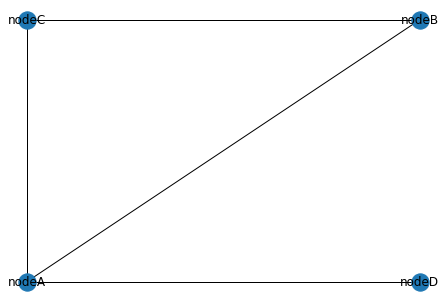

In [16]:
G.add_node("nodeD")
G.add_edge("nodeA", "nodeD")
pos["nodeD"] = (1,0)
nx.draw(G, pos, with_labels=True)